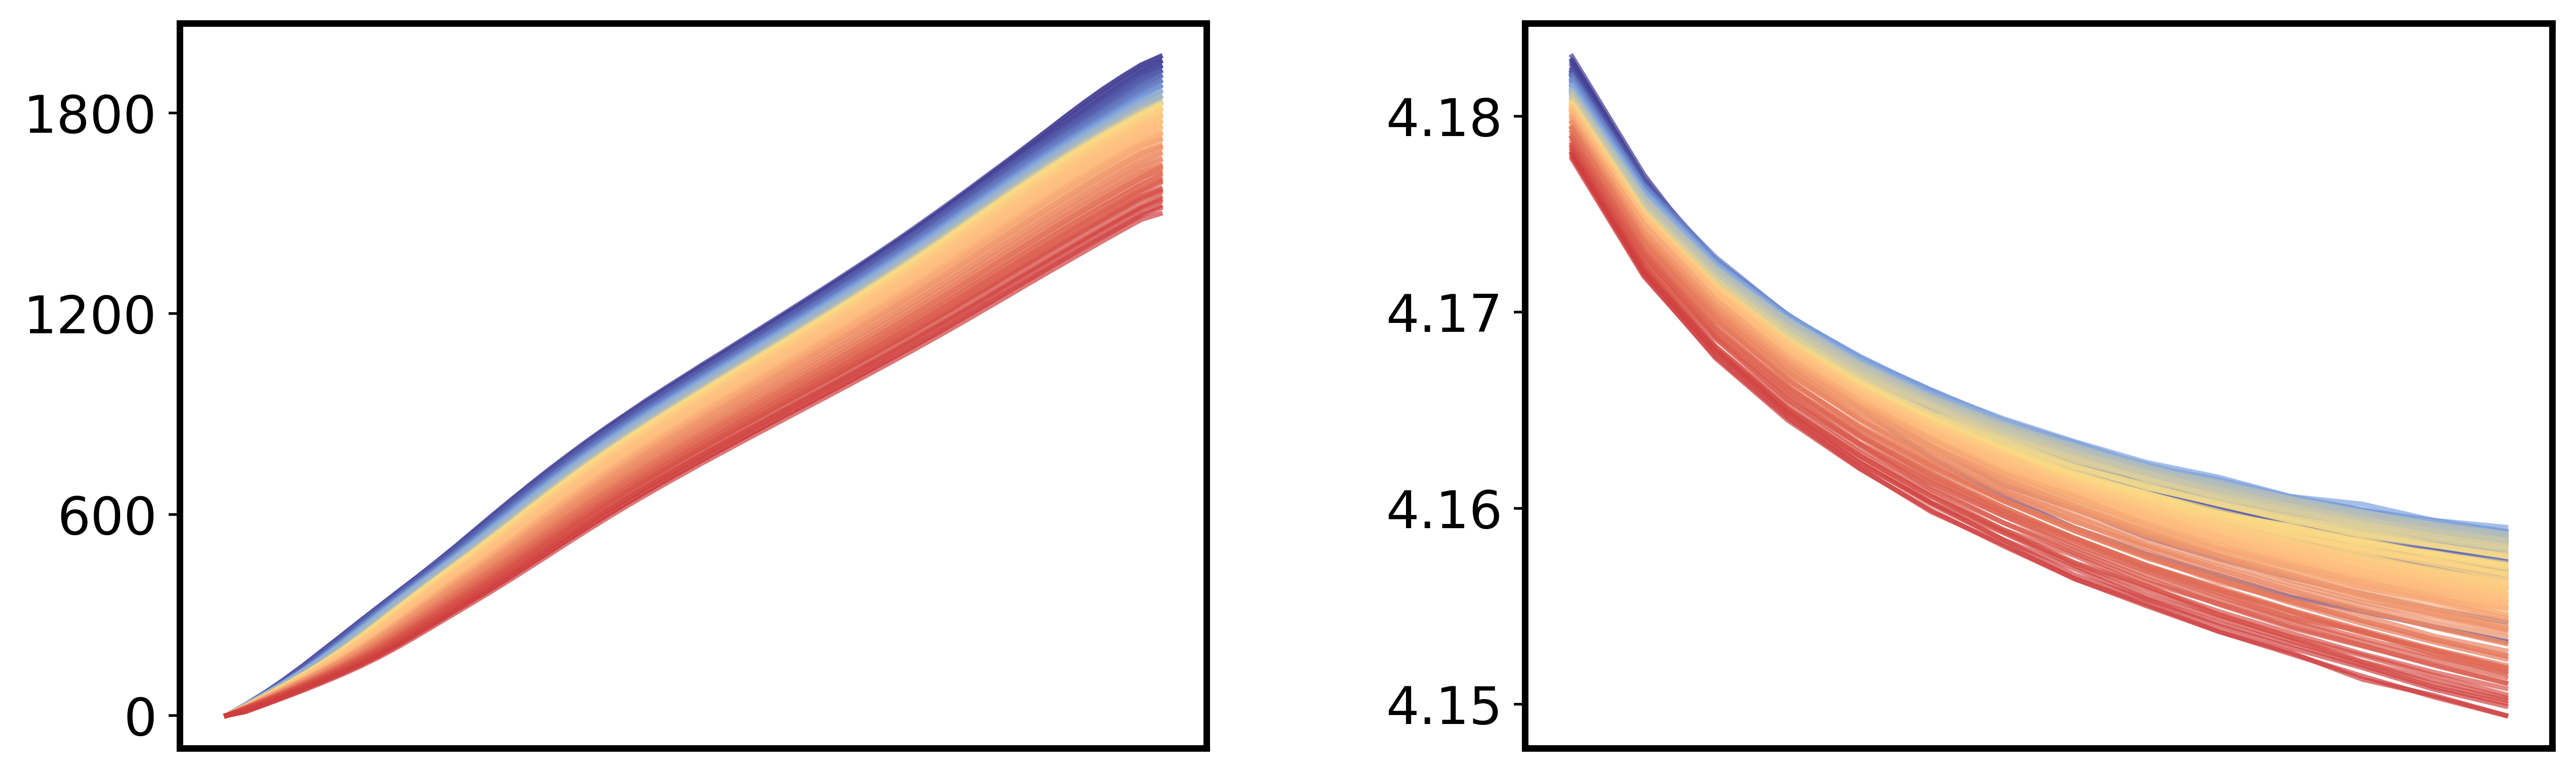

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

csv_path ="dataset/UL-NCA/CY25-05_1-#1.csv"

colors = ["#403990", "#80A6E2", "#FBDD85", "#FFBC80", "#CF3D3E"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

def safe_convert_array(data_str):
    try:
        cleaned_str = data_str.strip()
        if cleaned_str.startswith('[') and cleaned_str.endswith(']'):
            cleaned_str = cleaned_str[1:-1]
        
        if ',' in cleaned_str:
            parts = [x.strip() for x in cleaned_str.split(',') if x.strip()]
        else:
            parts = [x for x in cleaned_str.split() if x]
        
        return np.array([float(x) for x in parts])
    except Exception as e:
        print(f" {e}\n: {data_str}")
        return np.array([])

def plot_parameter(data, column_name, ax, max_points=None):
    cycle_colors = cmap(np.linspace(0, 1, len(data)))
    
    for i, row in data.iterrows():
        array_data = row[column_name]
        
        if isinstance(array_data, str):
            values = safe_convert_array(array_data)
        elif isinstance(array_data, (list, np.ndarray)):
            values = np.array(array_data)
        else:
            continue
        
        if len(values) == 0:
            continue

        if max_points is not None and len(values) > max_points:
            values = values[:max_points]
        
        x = np.arange(len(values))
        ax.plot(x, values, color=cycle_colors[i], alpha=0.7, linewidth=1.5)

    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel('')

    ax.yaxis.set_major_locator(plt.MaxNLocator(4)) 
    ax.tick_params(axis='y', labelsize=16)

    for spine in ax.spines.values():
        spine.set_linewidth(2)

try:
    data = pd.read_csv(csv_path)
    
    if 'Capacity_Increment' not in data.columns or 'Relaxation_Voltage' not in data.columns:
        raise ValueError("CSV 'Capacity_Increment' 'Relaxation_Voltage'")

    max_points = None
    if 'Relaxation_Voltage' in data.columns:
        lengths = [len(safe_convert_array(row['Relaxation_Voltage'])) for _, row in data.iterrows()]
        if lengths:
            max_points = min(lengths) 

    plt.figure(figsize=(13, 4), dpi=500)

    plt.subplots_adjust(wspace=0.31) 

    ax1 = plt.subplot(1, 2, 1)
    plot_parameter(data, 'Capacity_Increment', ax1)

    ax2 = plt.subplot(1, 2, 2)
    plot_parameter(data, 'Relaxation_Voltage', ax2, max_points=max_points)

    plt.show()

except FileNotFoundError:
    print(f"Error: '{csv_path}'")
except Exception as e:
    print(f"Error: {str(e)}")